In [49]:
# Autoreload modules without having to restart the notebook kernel.
%load_ext autoreload
%autoreload 2


# Plotting code stolen from Georg's notebook.
import matplotlib.pyplot as plt

%matplotlib inline
font = {'family': 'DejaVu Sans',
        'weight': 'bold',
        'size': 32}
plt.rc('font', **font)

import pandas as pd
import seaborn as sns

# Personal libraries
import lib.files
import lib.graph
import lib.cluster
import lib.constants
import lib.centrality

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Start by reading in the (icp55-cc-900-inv) network, it's mcl_clusters and their dataframe.

In [77]:
df.head()

,protein,deg,closeness,betweeness,eigenvector,bridging,clustering_coefficient,cluster,cluster_size
0,4932.YPL135W,14,0.250749,0.000035,0.000003,0.000004,0.868132,1,17
1,4932.YCL017C,23,0.261846,0.001463,0.000013,0.000041,0.395257,1,17
2,4932.YDL120W,22,0.267026,0.001664,0.000016,0.000028,0.415584,1,17
3,4932.YER048W-A,20,0.262077,0.000405,0.000012,0.000020,0.547368,1,17
4,4932.YGL018C,26,0.267398,0.000900,0.000018,0.000023,0.378462,1,17


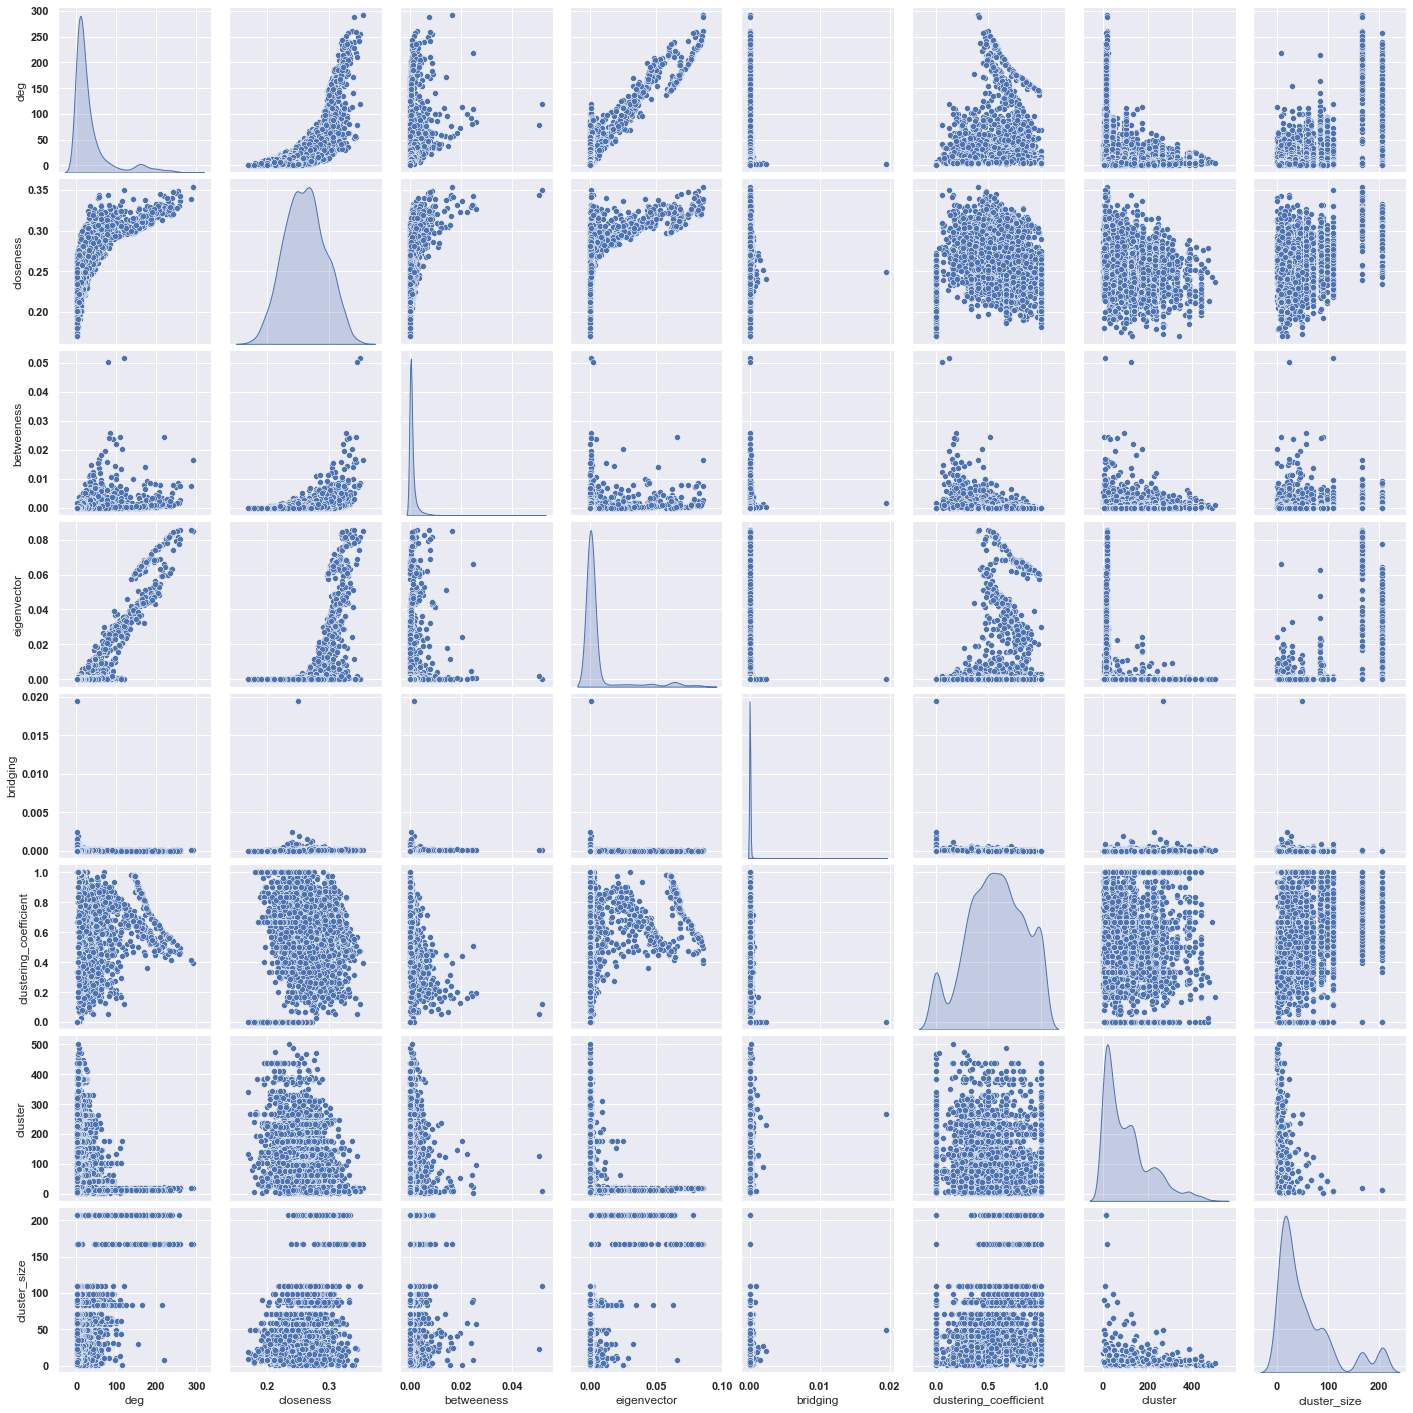

In [76]:
sns.set()
sns.pairplot(
    df,
    diag_kind='kde'
)

In [78]:
filepath = lib.files.make_filepath_to_networks('mcl_shorpl_lte_3.icp55-cc-900-inv.dataframe.csv')
df.to_csv(filepath)

GARBAGE BELOW

To declutter the analysis, I am going to look at clusters that are within 1 shorpl of pim1 or icp55. This leaves us with 8 clusters.

In [27]:
condition = (relevant_cluster_df['icp55_shorpl'] == 1) | (relevant_cluster_df['pim1_shorpl'] == 1)
shorpl_1_cluster_df = relevant_cluster_df[condition]
shorpl_1_cluster_df

,cluster,size,icp55_shorpl,pim1_shorpl,avg_clust_coeff,avg_deg,avg_inner_deg,avg_outer_deg
3,3,90,3,1,0.714783,30.922222,23.133333,7.788889
5,5,49,3,1,0.868475,25.836735,14.285714,11.551020
44,44,98,1,2,0.757859,45.816327,42.040816,3.775510
69,69,29,1,2,0.596108,12.586207,7.103448,5.482759
87,87,8,1,3,0.508333,5.250000,2.500000,2.750000
147,147,40,3,1,0.667253,23.400000,12.900000,10.500000
185,185,10,3,1,0.216667,4.700000,1.200000,3.500000
284,284,9,4,1,0.692593,6.888889,4.888889,2.000000


What if I represent clusters as a single node preserving all edges and calculate centralities.

In [ ]:
cluster_edges = []
for cluster_idx in relevant_cluster_df['cluster']:
    cluster = clusters[cluster_idx]
    for protein in cluster:
        for edge in network.edges(protein):
            other = edge[0] if edge[1] == protein else edge[1]
            if other not in cluster:
                other_cluster_idxs = lib.cluster.cluster_idxs_with_protein(clusters, other)


